In [1]:
import numpy as np
from matplotlib import pyplot as plt
from ahrs import filters

sample_rate = 1000

integrator = filters.AngularRate(frequency=sample_rate)
initial_pos_determination = filters.Tilt()

In [2]:
from test_data.import_data import get_data, get_gt

acc, gyro, mag = get_data()

estimations = np.empty((len(gyro), 4))
estimations[0] = initial_pos_determination.estimate(acc=acc[0], mag=mag[0])

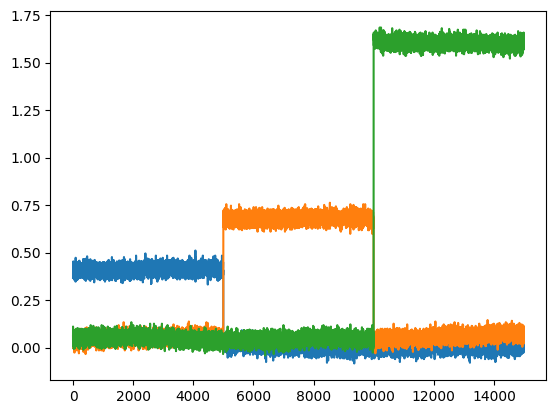

In [3]:
plt.plot(gyro)

In [4]:
for i in range(1, len(estimations)):
    estimations[i] = integrator.update(estimations[i-1], gyro[i])

In [5]:
from utils import quaternion_to_euler

phi_hat, theta_hat, psi_hat = quaternion_to_euler(estimations)

In [6]:
def clamp_to_360(x):
    x = np.mod(x, 360)
    return x

phi_hat = clamp_to_360(phi_hat)
theta_hat = clamp_to_360(theta_hat)
psi_hat = clamp_to_360(psi_hat)

In [7]:
phi, theta, psi = quaternion_to_euler(get_gt())

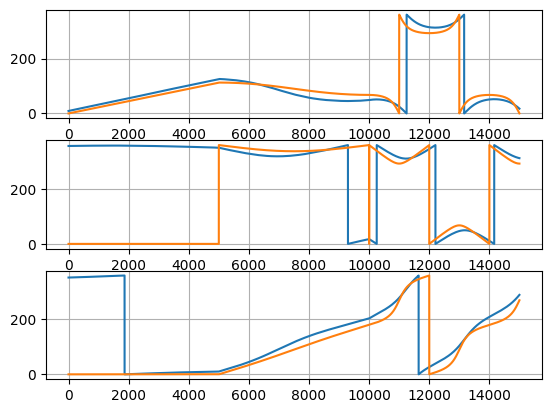

In [8]:
%matplotlib inline

plt.subplot(3, 1, 1)
plt.plot(phi_hat)
plt.plot(phi)
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(theta_hat)
plt.plot(theta)
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(psi_hat)
plt.plot(psi)
plt.grid()

plt.show()